In [59]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HackBU/DATA'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [60]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [61]:
train_list_mod=['Acne','Actinic Keratosis']

In [62]:
len(train_list_mod)

2

In [63]:
def data_dictionary():
    path_train="/content/drive/MyDrive/HackBU/DATA/train/"
    path_test="/content/drive/MyDrive/HackBU/DATA/testing/"
    list_train=train_list_mod#os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        path_disease_test=path_test+i
        image_list_train=os.listdir(path_disease_train)
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)
        for m in image_list_test :
            img_path_test=path_disease_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)

    return  train_df,test_df

In [64]:
def load_data(input_size=(100,100)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test

In [65]:
x_train,x_test,y_train,y_test=load_data(input_size=(100,100))

In [66]:
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input

In [67]:
vgg16 = VGG19(include_top=False,weights='imagenet')

In [68]:
vgg16.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [69]:
import joblib

In [70]:
filename="vgg16.sav"
joblib.dump(vgg16,open(filename,'wb'))

In [71]:
vgg19=joblib.load("vgg16.sav")

In [72]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)

In [73]:
features_train=vgg16.predict(train_img)

6/6 [==============================] - 27s 4s/step


In [74]:
features_train.shape

(176, 3, 3, 512)

In [75]:
features_test=vgg16.predict(test_img)

3/3 [==============================] - 11s 4s/step


In [76]:
features_test.shape

(74, 3, 3, 512)

In [77]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [78]:
x_train=features_train.reshape(num_train,4608)
x_test=features_test.reshape(num_test,4608)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [80]:
model=Sequential([ Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(6,activation='sigmoid'),

])

In [81]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [82]:
model.fit(x_train,y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
6/6 [==============================] - 3s 206ms/step - loss: 8.6479 - accuracy: 0.4545 - val_loss: 6.0782 - val_accuracy: 0.5000
Epoch 2/40
6/6 [==============================] - 1s 134ms/step - loss: 1.9210 - accuracy: 0.7614 - val_loss: 2.4138 - val_accuracy: 0.7162
Epoch 3/40
6/6 [==============================] - 1s 111ms/step - loss: 0.5865 - accuracy: 0.8864 - val_loss: 1.1550 - val_accuracy: 0.7432
Epoch 4/40
6/6 [==============================] - 1s 103ms/step - loss: 0.2799 - accuracy: 0.9602 - val_loss: 0.8823 - val_accuracy: 0.8919
Epoch 5/40
6/6 [==============================] - 1s 109ms/step - loss: 0.1799 - accuracy: 0.9545 - val_loss: 0.8048 - val_accuracy: 0.9189
Epoch 6/40
6/6 [==============================] - 1s 106ms/step - loss: 0.0686 - accuracy: 0.9886 - val_loss: 0.7023 - val_accuracy: 0.8243
Epoch 7/40
6/6 [==============================] - 1s 107ms/step - loss: 0.0204 - accuracy: 0.9943 - val_loss: 0.7592 - val_accuracy: 0.8649
Epoch 8/40
6/6 [====

In [83]:
print(f"Accuracy{model.history.history['accuracy']}")
print(f"Val accuracy:{round(max(model.history.history['val_accuracy']),5)}")

Accuracy[0.4545454680919647, 0.7613636255264282, 0.8863636255264282, 0.9602272510528564, 0.9545454382896423, 0.9886363744735718, 0.9943181872367859, 0.9943181872367859, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Val accuracy:0.91892


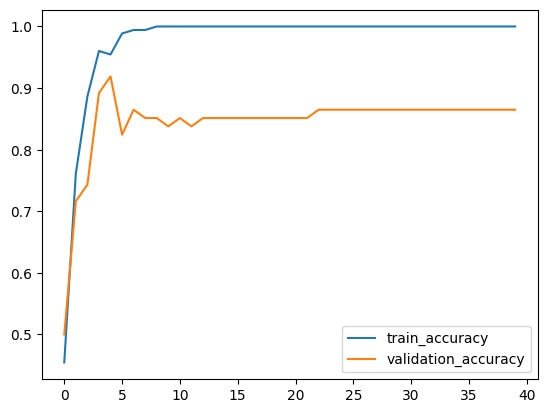

In [84]:
plt.plot(model.history.history['accuracy'],label="train_accuracy")
plt.plot(model.history.history['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.show()

In [85]:
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(100,100))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg16.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,4608)

    return f_img

In [86]:
!mkdir -p saved_model
model.save('saved_model/skin_model')

In [87]:
model=tf.keras.models.load_model('saved_model/skin_model')

In [88]:
img=load_img("/content/drive/MyDrive/HackBU/DATA/testing/Acne/acne-pustular-13.jpg")

1/1 [==============================] - 0s 170ms/step


In [89]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 86ms/step


0

In [90]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
